In [1]:
# Yuliya Akchurina
# CISC6210 - Natural Language Processing
# Fall 2021

In [2]:
import requests
from bs4 import BeautifulSoup
import re
import copy 
import itertools
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import PorterStemmer
porter = nltk.PorterStemmer()

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
#https://storm.cis.fordham.edu/~yli/data/electronics/ 
positive_url = "https://storm.cis.fordham.edu/~yli/data/electronics/positive.review"
negative_url = "https://storm.cis.fordham.edu/~yli/data/electronics/negative.review"

# <review_text>   </review_text>

In [4]:
page = requests.get(positive_url)
negative_page = requests.get(negative_url)

In [5]:
soup = BeautifulSoup(page.content, 'html.parser')
neg_soup = BeautifulSoup(negative_page.content, 'html.parser')

In [6]:
# Extract the review part between tags <review_text> into a list 
#positive reviews
output_list = []
for tag in soup.find_all("review_text"):
    output_list.append(tag.text)    #list size 1000

#negative reviews    
neg_output_list =[]
for tag in neg_soup.find_all("review_text"):
    neg_output_list.append(tag.text)    #list size 1000
     

In [7]:
# convert to lower case. 
for i in range(len(output_list)):
     output_list[i] = output_list[i].lower()

for i in range(len(neg_output_list)):
     neg_output_list[i] = neg_output_list[i].lower()

In [8]:
# Remove punctuation. Create two lists pos_nopunc and neg_nopunc, tokenized, lower case, no punctuation. 

pos_nopunc = []
for i in range(0,len(output_list)):
    pos_nopunc.append(re.split(r'\W+',output_list[i]))
    pos_nopunc[i] = [w for w in pos_nopunc[i] if w!='']
    
#print(pos_nopunc)

neg_nopunc = []
for i in range(0,len(neg_output_list)):
    neg_nopunc.append(re.split(r'\W+',neg_output_list[i]))
    neg_nopunc[i] = [w for w in neg_nopunc[i] if w!='']
    
#print(neg_nopunc)

In [9]:
# Make copies of the negative and positive lists to be used in BN and LR
pos_list = copy.deepcopy(pos_nopunc)
neg_list = copy.deepcopy(neg_nopunc)

In [10]:
# Remove stopwords
pos_without_sw = []
for i in range(len(pos_nopunc)):
    pos_without_sw.append([word for word in pos_nopunc[i] if not word in stopwords.words('english')])

#pos_without_sw - list of positive, no punc, removed stopwords

In [11]:
#print(pos_without_sw)

In [12]:
#remove stopwords
neg_without_sw = []
for i in range(len(neg_nopunc)):
    neg_without_sw.append([word for word in neg_nopunc[i] if not word in stopwords.words('english')])

#neg_without_sw - list of negative, no punc, removed stopwords

In [13]:
#print(neg_without_sw)

In [14]:
# stemming 
#positive, no punctuation, with stopwords 

porter = nltk.PorterStemmer()

pos_stemmed=[]
for i in range(len(pos_nopunc)):
    pos_stemmed.append([porter.stem(t) for t in pos_nopunc[i]])
    
#pos_stemmed - list of positive, no punc, kept stopwords, stemmed

In [15]:
#print(len(pos_stemmed))
#print(pos_stemmed[0])

1000
['i', 'purchas', 'thi', 'unit', 'due', 'to', 'frequent', 'blackout', 'in', 'my', 'area', 'and', '2', 'power', 'suppli', 'go', 'bad', 'it', 'will', 'run', 'my', 'cabl', 'modem', 'router', 'pc', 'and', 'lcd', 'monitor', 'for', '5', 'minut', 'thi', 'is', 'more', 'than', 'enough', 'time', 'to', 'save', 'work', 'and', 'shut', 'down', 'equal', 'import', 'i', 'know', 'that', 'my', 'electron', 'are', 'receiv', 'clean', 'power', 'i', 'feel', 'that', 'thi', 'invest', 'is', 'minor', 'compar', 'to', 'the', 'loss', 'of', 'valuabl', 'data', 'or', 'the', 'failur', 'of', 'equip', 'due', 'to', 'a', 'power', 'spike', 'or', 'an', 'irregular', 'power', 'suppli', 'as', 'alway', 'amazon', 'had', 'it', 'to', 'me', 'in', '2', 'busi', 'day']


In [16]:
# stemming 
# positive, no punctuation, without stopwords 

pos_stemmed_nosw=[]
for i in range(len(pos_without_sw)):
    pos_stemmed_nosw.append([porter.stem(t) for t in pos_without_sw[i]])

#pos_stemmed_nosw - list of positive, no punc, removed stopwords, stemmed

In [17]:
#print(len(pos_stemmed_nosw))
#print(pos_stemmed_nosw[0])

1000
['purchas', 'unit', 'due', 'frequent', 'blackout', 'area', '2', 'power', 'suppli', 'go', 'bad', 'run', 'cabl', 'modem', 'router', 'pc', 'lcd', 'monitor', '5', 'minut', 'enough', 'time', 'save', 'work', 'shut', 'equal', 'import', 'know', 'electron', 'receiv', 'clean', 'power', 'feel', 'invest', 'minor', 'compar', 'loss', 'valuabl', 'data', 'failur', 'equip', 'due', 'power', 'spike', 'irregular', 'power', 'suppli', 'alway', 'amazon', '2', 'busi', 'day']


In [18]:
# stemming 
#negative, no punctuation, kept stopwords 

neg_stemmed=[]
for i in range(len(neg_nopunc)):
    neg_stemmed.append([porter.stem(t) for t in neg_nopunc[i]])
# neg_stemmed - list of negative, no punc, kept stopwords, stemmed

In [19]:
#print(len(neg_stemmed))
#print(neg_stemmed[0])

1000
['con', 'tip', 'extrem', 'easi', 'on', 'carpet', 'and', 'if', 'you', 'have', 'a', 'lot', 'of', 'cd', 'stack', 'at', 'the', 'top', 'poorli', 'design', 'it', 'is', 'a', 'vertic', 'cd', 'rack', 'that', 'doesnt', 'have', 'individu', 'slot', 'for', 'cd', 'so', 'if', 'you', 'want', 'a', 'cd', 'from', 'the', 'bottom', 'of', 'a', 'stack', 'you', 'have', 'basic', 'pull', 'the', 'whole', 'stack', 'to', 'get', 'to', 'it', 'put', 'it', 'togeth', 'wa', 'a', 'pain', 'the', 'one', 'i', 'bought', 'i', 'had', 'to', 'break', 'a', 'piec', 'of', 'metal', 'just', 'to', 'fit', 'it', 'in', 'it', 'guid', 'hole', 'again', 'poorli', 'design', 'doesnt', 'even', 'fit', 'cd', 'that', 'well', 'there', 'are', 'gap', 'and', 'the', 'cd', 'cass', 'are', 'loos', 'fit', 'pro', 'i', 'guess', 'it', 'can', 'hold', 'a', 'lot', 'of', 'cd']


In [20]:
# stemming 
#negative, no punctuation, without stopwords 

neg_stemmed_nosw=[]
for i in range(len(neg_without_sw)):
    neg_stemmed_nosw.append([porter.stem(t) for t in neg_without_sw[i]])

#neg_stemmed_nosw - list of negative, no punc, removed stopwords, stemmed

In [21]:
#print(len(neg_stemmed_nosw))
#print(neg_stemmed_nosw[0])

1000
['con', 'tip', 'extrem', 'easi', 'carpet', 'lot', 'cd', 'stack', 'top', 'poorli', 'design', 'vertic', 'cd', 'rack', 'doesnt', 'individu', 'slot', 'cd', 'want', 'cd', 'bottom', 'stack', 'basic', 'pull', 'whole', 'stack', 'get', 'put', 'togeth', 'pain', 'one', 'bought', 'break', 'piec', 'metal', 'fit', 'guid', 'hole', 'poorli', 'design', 'doesnt', 'even', 'fit', 'cd', 'well', 'gap', 'cd', 'cass', 'loos', 'fit', 'pro', 'guess', 'hold', 'lot', 'cd']


In [22]:
""" Outcome lists: 

pos_list and pos_nopunc - list of positive, no puncutation, lower case
neg_list and neg_nopunc - list of negative, no puncutation, lower case
pos_without_sw - list of positive, no punc, removed stopwords
neg_without_sw - list of negative, no punc, removed stopwords
pos_stemmed -  list of negative, no punc, kept stopwords, stemmed
pos_stemmed_nosw -  list of positive, no punc, removed stopwords, stemmed
neg_stemmed - list of negative, no punc, kept stopwords, stemmed
neg_stemmed_nosw - list of negative, no punc, removed stopwords, stemmed
"""

' Outcome lists: \n\npos_list and pos_nopunc - list of positive, no puncutation, lower case\nneg_list and neg_nopunc - list of negative, no puncutation, lower case\npos_without_sw - list of positive, no punc, removed stopwords\nneg_without_sw - list of negative, no punc, removed stopwords\npos_stemmed -  list of negative, no punc, kept stopwords, stemmed\npos_stemmed_nosw -  list of positive, no punc, removed stopwords, stemmed\nneg_stemmed - list of negative, no punc, kept stopwords, stemmed\nneg_stemmed_nosw - list of negative, no punc, removed stopwords, stemmed\n'

In [23]:
# Find 20,50,100 most frequent words in the dataset of each class and
# show them in WordCloud. Investigate how many words show in both classes.

In [24]:
# Word frequency for Positive, stemmed, with stopwords 
joined_pos_stemmed = list(itertools.chain.from_iterable(pos_stemmed)) # combine nested lists into a single list 
fdist_pos = nltk.FreqDist(joined_pos_stemmed)

for key in fdist_pos:
    print(key + ':', fdist_pos[key], end='; ')

fdist_pos.most_common(20)

the: 6011; i: 3633; and: 2927; to: 2788; a: 2693; it: 2524; is: 1866; of: 1573; for: 1470; thi: 1366; you: 1196; in: 1190; that: 1181; with: 1147; my: 1143; on: 976; have: 963; use: 854; t: 703; but: 698; are: 665; as: 654; not: 638; s: 636; wa: 597; so: 517; be: 515; one: 505; can: 462; if: 450; or: 446; veri: 446; work: 442; good: 418; sound: 417; they: 415; great: 414; all: 412; at: 408; had: 380; your: 377; from: 374; these: 362; up: 358; get: 352; when: 350; like: 323; just: 319; ha: 302; no: 297; qualiti: 293; an: 291; other: 291; out: 279; phone: 275; about: 274; product: 274; onli: 273; price: 271; would: 269; will: 268; than: 268; them: 268; well: 266; more: 262; time: 255; me: 250; also: 249; which: 248; do: 247; speaker: 244; ve: 236; need: 236; there: 236; buy: 218; some: 217; don: 216; look: 216; cabl: 214; problem: 212; bought: 206; ipod: 200; go: 196; 2: 190; am: 188; better: 186; set: 185; even: 183; much: 180; player: 180; ani: 178; want: 178; m: 174; becaus: 173; purc

[('the', 6011),
 ('i', 3633),
 ('and', 2927),
 ('to', 2788),
 ('a', 2693),
 ('it', 2524),
 ('is', 1866),
 ('of', 1573),
 ('for', 1470),
 ('thi', 1366),
 ('you', 1196),
 ('in', 1190),
 ('that', 1181),
 ('with', 1147),
 ('my', 1143),
 ('on', 976),
 ('have', 963),
 ('use', 854),
 ('t', 703),
 ('but', 698)]

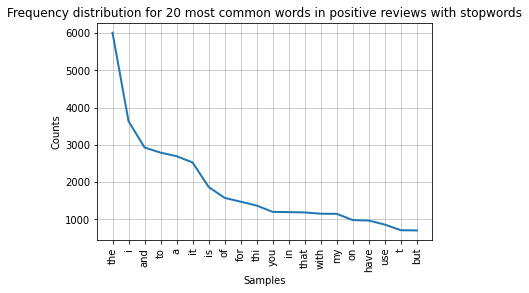

<AxesSubplot:title={'center':'Frequency distribution for 20 most common words in positive reviews with stopwords'}, xlabel='Samples', ylabel='Counts'>

In [25]:
fdist_pos.plot(20,title='Frequency distribution for 20 most common words in positive reviews with stopwords')

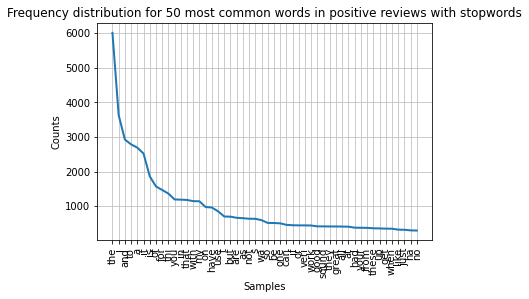

<AxesSubplot:title={'center':'Frequency distribution for 50 most common words in positive reviews with stopwords'}, xlabel='Samples', ylabel='Counts'>

In [26]:
fdist_pos.plot(50,title='Frequency distribution for 50 most common words in positive reviews with stopwords')

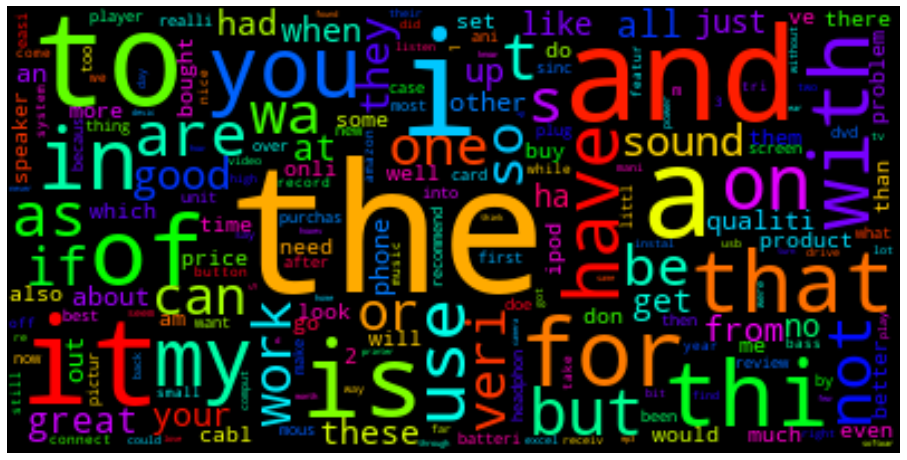

In [27]:
# WordCloud for Positive reviews with stopwords 
joined_pos_stemmed = []
joined_pos_stemmed = list(itertools.chain.from_iterable(pos_stemmed)) # combine nested lists into a single list 
dictionary = Counter(joined_pos_stemmed)
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
# Word frequency for Positive, stemmed, without stop words 
   
joined_pos_stemmed_nosw = list(itertools.chain.from_iterable(pos_stemmed_nosw)) # combine nested lists into a single list 

fdist_pos_nosw = nltk.FreqDist(joined_pos_stemmed_nosw)

for key in fdist_pos_nosw:
    print(key + ':', fdist_pos_nosw[key], end='; ')

fdist_pos_nosw.most_common(20)

use: 854; one: 505; work: 442; good: 418; sound: 417; great: 414; get: 352; like: 323; qualiti: 293; phone: 275; product: 274; price: 271; would: 269; well: 266; time: 255; also: 249; speaker: 244; need: 236; buy: 218; look: 216; cabl: 214; problem: 212; bought: 206; ipod: 200; go: 196; 2: 190; better: 186; set: 185; even: 183; much: 180; player: 180; want: 178; purchas: 172; realli: 172; littl: 170; unit: 169; make: 169; case: 168; batteri: 165; easi: 164; headphon: 163; recommend: 152; mous: 150; 1: 148; first: 146; card: 144; review: 144; dvd: 138; best: 136; new: 136; plug: 131; pictur: 130; thing: 129; sinc: 129; screen: 129; connect: 129; button: 127; small: 126; take: 125; system: 124; record: 124; featur: 123; still: 123; music: 123; tri: 120; bass: 120; nice: 119; amazon: 118; year: 118; 3: 117; come: 117; 5: 116; lot: 115; bit: 114; mani: 112; could: 112; power: 111; back: 111; got: 111; way: 110; comput: 110; without: 109; seem: 109; two: 106; right: 106; video: 105; find: 1

[('use', 854),
 ('one', 505),
 ('work', 442),
 ('good', 418),
 ('sound', 417),
 ('great', 414),
 ('get', 352),
 ('like', 323),
 ('qualiti', 293),
 ('phone', 275),
 ('product', 274),
 ('price', 271),
 ('would', 269),
 ('well', 266),
 ('time', 255),
 ('also', 249),
 ('speaker', 244),
 ('need', 236),
 ('buy', 218),
 ('look', 216)]

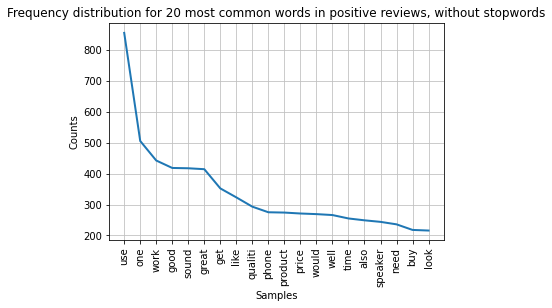

<AxesSubplot:title={'center':'Frequency distribution for 20 most common words in positive reviews, without stopwords'}, xlabel='Samples', ylabel='Counts'>

In [29]:
fdist_pos_nosw.plot(20,title='Frequency distribution for 20 most common words in positive reviews, without stopwords')

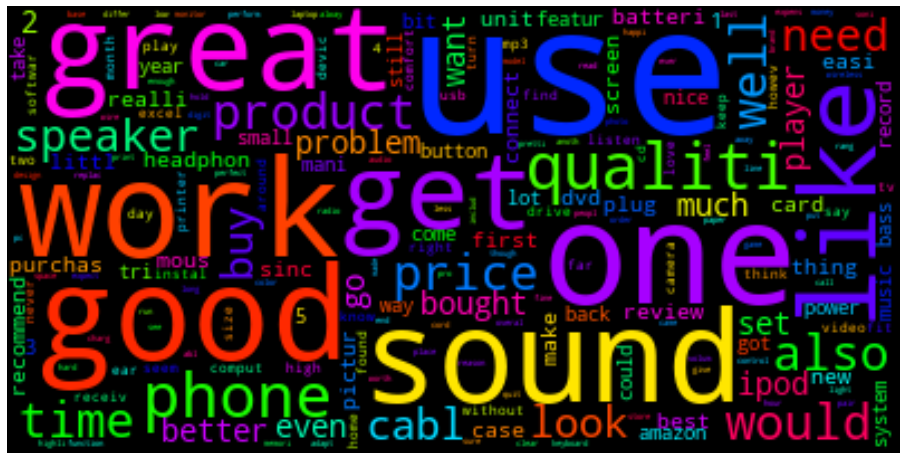

In [30]:
# WordCloud for Positive reviews without stopwords 

dictionary=Counter(joined_pos_stemmed_nosw)
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
# Word frequency for Negative, stemmed, with stopwords 
joined_neg_stemmed = []
joined_neg_stemmed = list(itertools.chain.from_iterable(neg_stemmed)) # combine nested lists into a single list 
fdist_neg = nltk.FreqDist(joined_neg_stemmed)

for key in fdist_neg:
    print(key + ':', fdist_neg[key], end='; ')

fdist_neg.most_common(20)

the: 6002; i: 4076; to: 3078; it: 2894; and: 2799; a: 2525; is: 1578; of: 1551; thi: 1517; that: 1266; for: 1211; in: 1125; my: 1091; not: 1006; with: 994; you: 970; on: 962; have: 932; t: 886; wa: 882; but: 834; work: 718; they: 582; be: 557; use: 552; one: 523; so: 495; s: 489; get: 471; at: 460; if: 457; as: 444; all: 441; are: 437; from: 435; or: 430; me: 418; when: 411; had: 409; would: 377; no: 371; product: 370; just: 369; after: 369; out: 361; time: 353; can: 337; veri: 335; will: 331; up: 328; these: 321; about: 314; your: 311; an: 307; them: 291; problem: 291; unit: 289; ha: 278; buy: 278; don: 278; other: 277; do: 276; there: 271; onli: 271; back: 271; tri: 270; bought: 258; good: 247; even: 244; like: 242; card: 238; then: 238; what: 236; sound: 235; phone: 233; purchas: 221; return: 218; now: 218; more: 217; m: 217; first: 216; which: 215; than: 214; ani: 208; becaus: 199; 2: 196; ipod: 195; month: 192; go: 191; qualiti: 183; some: 182; thing: 182; got: 179; am: 179; suppo

[('the', 6002),
 ('i', 4076),
 ('to', 3078),
 ('it', 2894),
 ('and', 2799),
 ('a', 2525),
 ('is', 1578),
 ('of', 1551),
 ('thi', 1517),
 ('that', 1266),
 ('for', 1211),
 ('in', 1125),
 ('my', 1091),
 ('not', 1006),
 ('with', 994),
 ('you', 970),
 ('on', 962),
 ('have', 932),
 ('t', 886),
 ('wa', 882)]

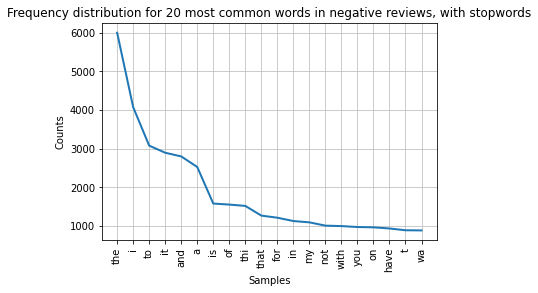

<AxesSubplot:title={'center':'Frequency distribution for 20 most common words in negative reviews, with stopwords'}, xlabel='Samples', ylabel='Counts'>

In [32]:
fdist_neg.plot(20,title='Frequency distribution for 20 most common words in negative reviews, with stopwords')

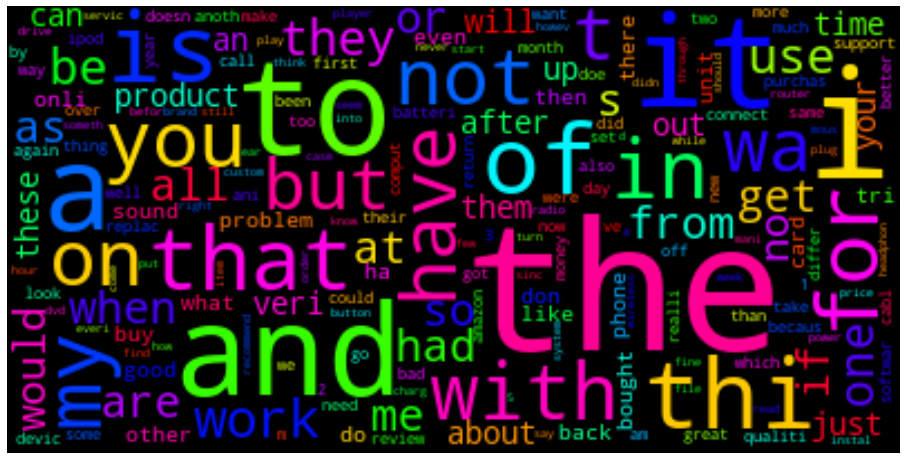

In [33]:
# WordCloud for Negative reviews with stopwords 
#joined_neg_stemmed = list(itertools.chain.from_iterable(neg_stemmed)) # combine nested lists into a single list 
dictionary = Counter(joined_neg_stemmed)
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
# Word frequency for Negative, stemmed, without stop words 
joined_neg_stemmed_nosw = []
joined_neg_stemmed_nosw = list(itertools.chain.from_iterable(neg_stemmed_nosw)) # combine nested lists into a single list 

fdist_neg_nosw = nltk.FreqDist(joined_neg_stemmed_nosw)

for key in fdist_neg_nosw:
    print(key + ':', fdist_neg_nosw[key], end='; ')

fdist_neg_nosw.most_common(20)

work: 718; use: 552; one: 523; get: 471; would: 377; product: 370; time: 353; problem: 291; unit: 289; buy: 278; back: 271; tri: 270; bought: 258; good: 247; even: 244; like: 242; card: 238; sound: 235; phone: 233; purchas: 221; return: 218; first: 216; 2: 196; ipod: 195; month: 192; go: 191; qualiti: 183; thing: 182; got: 179; support: 177; cabl: 176; batteri: 171; connect: 171; day: 167; two: 165; well: 164; new: 164; anoth: 164; make: 164; review: 162; could: 161; call: 159; great: 157; 1: 157; need: 156; replac: 153; better: 152; comput: 152; much: 151; set: 150; year: 149; softwar: 147; 3: 146; look: 145; money: 141; also: 137; want: 136; realli: 134; devic: 133; way: 129; take: 129; bad: 123; differ: 123; amazon: 123; player: 121; still: 121; week: 120; headphon: 116; find: 115; hour: 114; servic: 113; know: 113; turn: 111; mous: 111; never: 110; router: 110; drive: 110; item: 109; dvd: 108; instal: 108; say: 107; start: 106; 5: 105; radio: 105; price: 104; button: 103; custom: 1

[('work', 718),
 ('use', 552),
 ('one', 523),
 ('get', 471),
 ('would', 377),
 ('product', 370),
 ('time', 353),
 ('problem', 291),
 ('unit', 289),
 ('buy', 278),
 ('back', 271),
 ('tri', 270),
 ('bought', 258),
 ('good', 247),
 ('even', 244),
 ('like', 242),
 ('card', 238),
 ('sound', 235),
 ('phone', 233),
 ('purchas', 221)]

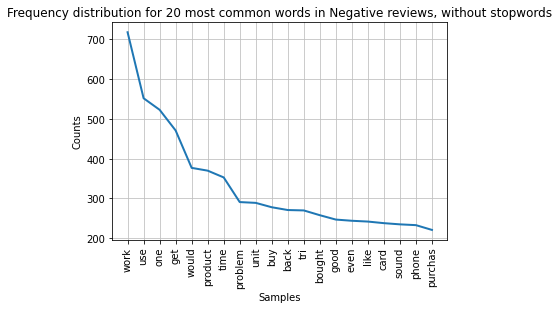

<AxesSubplot:title={'center':'Frequency distribution for 20 most common words in Negative reviews, without stopwords'}, xlabel='Samples', ylabel='Counts'>

In [35]:
fdist_neg_nosw.plot(20,title='Frequency distribution for 20 most common words in Negative reviews, without stopwords')

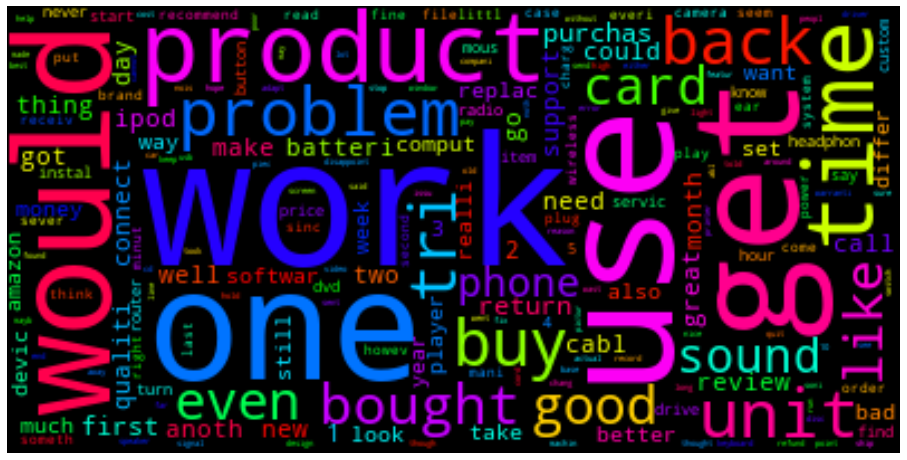

In [36]:
# WordCloud for Negative reviews without stopwords 

dictionary = Counter(joined_neg_stemmed_nosw)
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
# How many words show in both classes?
# With stopwords 
# fdist_pos - freqdist positive with stopwords. length 5940
# fdist_neg - freqdist negative with stopwords. length 5526
# Without stopwords
# fdist_pos_nosw - freqdist positive without stopwords. Length 5822
# fdist_neg_nosw - freqdist negative without stopwords. Length 5405


#shared_keys = set(fdist_pos).intersection(fdist_neg)

In [38]:
shared_words = []
pos_count = []
neg_count = []

for key in fdist_pos.keys():
    #print(key)
    if key in fdist_neg:
        #print(f"Word is {key}")
        #print(f"Count in Positive {fdist_pos[key]}")
        #print(f"Count in Negative {fdist_neg[key]}")
        shared_words.append(key)
        pos_count.append(fdist_pos[key])
        neg_count.append(fdist_neg[key])
    
print(f"There are {len(shared_words)} shared words between Positive and Negative classes with stopwords included.")
# There are 3328 shared words between positive and negative classes with stopwords included     

There are 3328 shared words between Positive and Negative classes with stopwords included.


In [39]:
shared_words_nosw = []
pos_count_nosw = []
neg_count_nosw = []

for key in fdist_pos_nosw.keys():
    #print(key)
    if key in fdist_neg_nosw:
        #print(f"Word is {key}")
        #print(f"Count in Positive {fdist_pos_nosw[key]}")
        #print(f"Count in Negative {fdist_neg_nosw[key]}")
        shared_words_nosw.append(key)
        pos_count_nosw.append(fdist_pos_nosw[key])
        neg_count_nosw.append(fdist_neg_nosw[key])
        
print(f"There are {len(shared_words_nosw)} shared words between Positive and Negative classes without stopwords.")
# There are 3204 shared words between positive and negative classes without stopwords         

There are 3204 shared words between Positive and Negative classes without stopwords.


In [40]:
# Find with stop words have the same counts in positive and negative classes with stopwords included 

equal_count = []

for i in range(len(shared_words)):
    if pos_count[i] == neg_count[i]:
        equal_count.append(shared_words[i])

print(f"There are {len(equal_count)} words that have equal counts in both classes.")
# There are 526 words that have equal counts in both classes.

#print(equal_count)

There are 526 words that have equal counts in both classes.


In [41]:
# Find with stop words have the same counts in positive and negative classes with stopwords removed
equal_count_nosw = []

for i in range(len(shared_words_nosw)):
    if pos_count_nosw[i] == neg_count_nosw[i]:
        equal_count_nosw.append(shared_words_nosw[i])

print(f"There are {len(equal_count_nosw)} words that have equal counts in both classes with stopwords removed.")
# There are 530 words that have equal counts in both classes with stopwords removed.

#print(equal_count_nosw)

There are 530 words that have equal counts in both classes with stopwords removed.


In [42]:
# Labeled datasets of each class are divided to two parts: training and test

In [43]:
#Positive reviews. Convert tokenized words to strings before converting to dataframe 
pos_sentstr = []
for i in range(len(pos_nopunc)):
    pos_sentstr.append(' '.join([str(elem) for elem in pos_nopunc[i]]))
    
# create dataframe from Positive reviews with stopwords 
df_pos = pd.DataFrame(pos_sentstr)

df_pos['Class'] = 1  #Positive
df_pos.columns = ["Review", "Class"]

#print(df_pos)

In [44]:
#Negative reviews. Convert tokenized words to strings before converting to dataframe 
neg_sentstr = []
for i in range(len(neg_nopunc)):
    neg_sentstr.append(' '.join([str(elem) for elem in neg_nopunc[i]]))
    
# create dataframe from Negative reviews with stopwords 
df_neg = pd.DataFrame(neg_sentstr)

df_neg['Class'] = 0  #Negative
df_neg.columns = ["Review", "Class"]

#print(df_neg)

In [45]:
# Combine Positive and Negative reviews into a single dataframe. Size [2000 rows x 2 columns]

df_withsw = pd.concat([df_pos, df_neg], ignore_index = True)  # with swtopwords
#print(df_withsw)

In [46]:
# check for missing values
print(df_withsw.isna().mean())
# check the class distribution 
print(df_withsw.Class.value_counts())

Review    0.0
Class     0.0
dtype: float64
1    1000
0    1000
Name: Class, dtype: int64


In [47]:
# Create dataframe from Positive reviews without stopwords 

pos_nosw_sentstr = []
for i in range(len(pos_without_sw)):
    pos_nosw_sentstr.append(' '.join([str(elem) for elem in pos_without_sw[i]]))
    

df_pos_nosw = pd.DataFrame(pos_nosw_sentstr)

df_pos_nosw['Class'] = 1  #Positive
df_pos_nosw.columns = ["Review", "Class"]

#print(df_pos_nosw)

In [48]:
# Create dataframe from Negative reviews without stopwords 

neg_nosw_sentstr = []
for i in range(len(neg_without_sw)):
    neg_nosw_sentstr.append(' '.join([str(elem) for elem in neg_without_sw[i]]))
    

df_neg_nosw = pd.DataFrame(neg_nosw_sentstr)

df_neg_nosw['Class'] = 0  #Negative
df_neg_nosw.columns = ["Review", "Class"]

#print(df_neg_nosw)

In [49]:
# Combine Positive and Negative reviews into a single dataframe. Without Stopwords. Size [2000 rows x 2 columns]

df_nosw = pd.concat([df_pos_nosw, df_neg_nosw], ignore_index = True)  # without swtopwords
#print(df_nosw)

In [50]:
# check for missing values
print(df_nosw.isna().mean())
# check the class distribution 
print(df_nosw.Class.value_counts())

Review    0.0
Class     0.0
dtype: float64
1    1000
0    1000
Name: Class, dtype: int64


In [51]:
# Sentiment Analysis with Naive Bayes Classifier 
# 1. With word counts
#     Dataframe with stopwords
#     Dataframe without stopwords 
# 2. With tf-dif and word occurence
#     Dataframe with stopwords
#     Dataframe without stopwords 
# Datafarames: df_withsw and df_nosw

In [52]:
# Import sklearn libraries 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression



In [53]:
# Multinomial Naive Bayes. With stopwords. 

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
#cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize)
word_counts = cv.fit_transform(df_withsw['Review'])

X_train, X_test, Y_train, Y_test = train_test_split(word_counts, df_withsw['Class'], test_size=0.3, random_state=42)

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

print("Multinomial Naive Bayes Accuracy = " + str("{:04.2f}".format(accuracy_score*100))+"%")
print(f"\nConfusion Matrix for Multinomial Naive Bayes: \n{metrics.confusion_matrix(Y_test, predicted)}")
print(f"\nClassification Report: \n{metrics.classification_report(Y_test, predicted)}")

Multinomial Naive Bayes Accuracy = 81.83%

Confusion Matrix for Multinomial Naive Bayes: 
[[258  40]
 [ 69 233]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       298
           1       0.85      0.77      0.81       302

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



In [54]:
# Multinomial Naive Bayes. Without stopwords, removed by the CountVectorizer. 

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
#cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize)
word_counts = cv.fit_transform(df_withsw['Review'])

X_train, X_test, Y_train, Y_test = train_test_split(word_counts, df_withsw['Class'], test_size=0.3, random_state=42)

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

print("Multinomial Naive Bayes Accuracy = " + str("{:04.2f}".format(accuracy_score*100))+"%")
print(f"\nConfusion Matrix for Multinomial Naive Bayes: \n{metrics.confusion_matrix(Y_test, predicted)}")
print(f"\nClassification Report: \n{metrics.classification_report(Y_test, predicted)}")

Multinomial Naive Bayes Accuracy = 79.33%

Confusion Matrix for Multinomial Naive Bayes: 
[[251  47]
 [ 77 225]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       298
           1       0.83      0.75      0.78       302

    accuracy                           0.79       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.79      0.79       600



In [55]:
# Multinomial Naive Bayes. Without stopwords, removed by the text preprocessing. 

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
#cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize)
word_counts = cv.fit_transform(df_nosw['Review'])

X_train, X_test, Y_train, Y_test = train_test_split(word_counts, df_nosw['Class'], test_size=0.3, random_state=42)

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

print("Multinomial Naive Bayes Accuracy = " + str("{:04.2f}".format(accuracy_score*100))+"%")
print(f"\nConfusion Matrix for Multinomial Naive Bayes: \n{metrics.confusion_matrix(Y_test, predicted)}")
print(f"\nClassification Report: \n{metrics.classification_report(Y_test, predicted)}")

Multinomial Naive Bayes Accuracy = 80.83%

Confusion Matrix for Multinomial Naive Bayes: 
[[253  45]
 [ 70 232]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       298
           1       0.84      0.77      0.80       302

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



In [56]:
# Bernoulli Naive Bayes. With stopwords. 

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize)
word_counts = cv.fit_transform(df_withsw['Review'])

X_train, X_test, Y_train, Y_test = train_test_split(word_counts, df_withsw['Class'], test_size=0.3, random_state=42)

BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted, Y_test)

print("Bernoulli Naive Bayes Accuracy = " + str("{:04.2f}".format(accuracy_score*100))+"%")
print(f"\nConfusion Matrix for Bernoulli Naive Bayes: \n{metrics.confusion_matrix(Y_test, predicted)}")
print(f"\nClassification Report: \n{metrics.classification_report(Y_test, predicted)}")

Bernoulli Naive Bayes Accuracy = 80.83%

Confusion Matrix for Bernoulli Naive Bayes: 
[[228  70]
 [ 49 253]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       298
           1       0.78      0.84      0.81       302

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



In [57]:
# Bernoulli Naive Bayes. With stopwords. Binary

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize, binary = True)
word_counts = cv.fit_transform(df_withsw['Review'])

X_train, X_test, Y_train, Y_test = train_test_split(word_counts, df_withsw['Class'], test_size=0.3, random_state=42)

BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted, Y_test)

print("Bernoulli Naive Bayes Accuracy = " + str("{:04.2f}".format(accuracy_score*100))+"%")
print(f"\nConfusion Matrix for Bernoulli Naive Bayes: \n{metrics.confusion_matrix(Y_test, predicted)}")
print(f"\nClassification Report: \n{metrics.classification_report(Y_test, predicted)}")

Bernoulli Naive Bayes Accuracy = 80.83%

Confusion Matrix for Bernoulli Naive Bayes: 
[[228  70]
 [ 49 253]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       298
           1       0.78      0.84      0.81       302

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



In [58]:
# Bernoulli Naive Bayes. Without stopwords, removed by the CountVectorizer. 

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range = (1,1),tokenizer = token.tokenize)
word_counts = cv.fit_transform(df_withsw['Review'])

X_train, X_test, Y_train, Y_test = train_test_split(word_counts, df_withsw['Class'], test_size=0.3, random_state=42)

BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted, Y_test)

print("Bernoulli Naive Bayes Accuracy = " + str("{:04.2f}".format(accuracy_score*100))+"%")
print(f"\nConfusion Matrix for Bernoulli Naive Bayes: \n{metrics.confusion_matrix(Y_test, predicted)}")
print(f"\nClassification Report: \n{metrics.classification_report(Y_test, predicted)}")

Bernoulli Naive Bayes Accuracy = 80.83%

Confusion Matrix for Bernoulli Naive Bayes: 
[[246  52]
 [ 63 239]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       298
           1       0.82      0.79      0.81       302

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



In [59]:
# Bernoulli Naive Bayes. Without stopwords, removed by the text preprocessing. 

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize)
word_counts = cv.fit_transform(df_nosw['Review'])

X_train, X_test, Y_train, Y_test = train_test_split(word_counts, df_nosw['Class'], test_size=0.3, random_state=42)

BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted, Y_test)

print("Bernoulli Naive Bayes Accuracy = " + str("{:04.2f}".format(accuracy_score*100))+"%")
print(f"\nConfusion Matrix for Bernoulli Naive Bayes: \n{metrics.confusion_matrix(Y_test, predicted)}")
print(f"\nClassification Report: \n{metrics.classification_report(Y_test, predicted)}")

Bernoulli Naive Bayes Accuracy = 80.83%

Confusion Matrix for Bernoulli Naive Bayes: 
[[242  56]
 [ 49 253]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       298
           1       0.82      0.84      0.83       302

    accuracy                           0.82       600
   macro avg       0.83      0.82      0.82       600
weighted avg       0.83      0.82      0.82       600



In [60]:
# Bernoulli Naive Bayes. Without stopwords, removed by the text preprocessing. Binary word representation

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize, binary = True)
word_counts = cv.fit_transform(df_nosw['Review'])

X_train, X_test, Y_train, Y_test = train_test_split(word_counts, df_nosw['Class'], test_size=0.3, random_state=42)

BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted, Y_test)

print("Bernoulli Naive Bayes Accuracy = " + str("{:04.2f}".format(accuracy_score*100))+"%")
print(f"\nConfusion Matrix for Bernoulli Naive Bayes: \n{metrics.confusion_matrix(Y_test, predicted)}")
print(f"\nClassification Report: \n{metrics.classification_report(Y_test, predicted)}")

Bernoulli Naive Bayes Accuracy = 80.83%

Confusion Matrix for Bernoulli Naive Bayes: 
[[242  56]
 [ 49 253]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       298
           1       0.82      0.84      0.83       302

    accuracy                           0.82       600
   macro avg       0.83      0.82      0.82       600
weighted avg       0.83      0.82      0.82       600



In [61]:
# TF-IDF. With stopwords 
# Datafarames: df_withsw and df_nosw

tfidf = TfidfVectorizer()
text_count = tfidf.fit_transform(df_withsw['Review'])

x_train, x_test, y_train, y_test = train_test_split(text_count, df_withsw['Class'],test_size=0.3,random_state=42)


#compilimg the model -> we are going to use already used models MNB and BNB

MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('Multinomial Naive Bayes Accuracy Score = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')
print(f"\nConfusion Matrix for Multinomial Naive Bayes: \n{metrics.confusion_matrix(y_test, MNB.predict(x_test))}")
print(f"\nClassification Report: \n{metrics.classification_report(y_test, MNB.predict(x_test))}")


BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('Bernoulli Naive Bayes Accuracy Score = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print(f"\nConfusion Matrix for Bernoulli Naive Bayes: \n{metrics.confusion_matrix(y_test, BNB.predict(x_test))}")
print(f"\nClassification Report: \n{metrics.classification_report(y_test, BNB.predict(x_test))}")


Multinomial Naive Bayes Accuracy Score = 83.17%

Confusion Matrix for Multinomial Naive Bayes: 
[[270  28]
 [ 73 229]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       298
           1       0.89      0.76      0.82       302

    accuracy                           0.83       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600

Bernoulli Naive Bayes Accuracy Score = 80.67%

Confusion Matrix for Bernoulli Naive Bayes: 
[[230  68]
 [ 48 254]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       298
           1       0.79      0.84      0.81       302

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



In [62]:
# TF-IDF. Without stopwords 
# Datafarames: df_withsw and df_nosw

tfidf = TfidfVectorizer()
text_count = tfidf.fit_transform(df_nosw['Review'])

x_train, x_test, y_train, y_test = train_test_split(text_count, df_nosw['Class'],test_size=0.3,random_state=42)


#compilimg the model -> we are going to use already used models MNB and BNB

MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('Multinomial Naive Bayes Accuracy Score = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')
print(f"\nConfusion Matrix for Multinomial Naive Bayes: \n{metrics.confusion_matrix(y_test, MNB.predict(x_test))}")
print(f"\nClassification Report: \n{metrics.classification_report(y_test, MNB.predict(x_test))}")


BNB.fit(x_train, y_train)
accuracy_score_bn = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('Bernoulli Naive Bayes Accuracy Score = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print(f"\nConfusion Matrix for Bernoulli Naive Bayes: \n{metrics.confusion_matrix(y_test, BNB.predict(x_test))}")
print(f"\nClassification Report: \n{metrics.classification_report(y_test, BNB.predict(x_test))}")

Multinomial Naive Bayes Accuracy Score = 83.33%

Confusion Matrix for Multinomial Naive Bayes: 
[[259  39]
 [ 61 241]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       298
           1       0.86      0.80      0.83       302

    accuracy                           0.83       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600

Bernoulli Naive Bayes Accuracy Score = 80.67%

Confusion Matrix for Bernoulli Naive Bayes: 
[[242  56]
 [ 48 254]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       298
           1       0.82      0.84      0.83       302

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



In [63]:
# Sentiment Analysis with Logistic Regression
# 1. With word counts
#     Dataframe with stopwords
#     Dataframe without stopwords 
# 2. With tf-dif and word occurence
#     Dataframe with stopwords
#     Dataframe without stopwords 
# compare their performance, precision, recall, f-score 

In [64]:
def print_wordcloud(list):
    unique_string=(" ").join(list)
    wordcloud = WordCloud(width=2000, height=1000, max_words=20, relative_scaling = 0, 
                          background_color = "black").generate(unique_string)
    plt.figure(figsize=(16,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [65]:
# Split datafarmes df_withsw and df_nosw
# With stopwords 
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize)
word_counts = cv.fit_transform(df_withsw['Review'])
X_train, X_test, Y_train, Y_test = train_test_split(word_counts, df_withsw['Class'], test_size=0.3, random_state=42)


# Without stopwords 
word_counts = cv.fit_transform(df_nosw['Review'])
x_train_nosw, x_test_nosw, y_train_nosw, y_test_nosw = train_test_split(text_count, df_nosw['Class'],test_size=0.3,random_state=42)

# With stopwords. Binary counts 
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize, binary= True)
word_counts = cv.fit_transform(df_withsw['Review'])
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(word_counts, df_withsw['Class'], test_size=0.3, random_state=42)


In [66]:
#Logistic regression with text with stopwords, X_train, X_test, Y_train, Y_test
lr_model = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr_model.fit(X_train, Y_train)
y_pred = lr_model.predict(X_test)

accuracy_score_lr = metrics.accuracy_score(lr_model.predict(X_test), Y_test)
print('Logistic Regression Accuracy Score = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')
print(f"\nConfusion Matrix for Logistic Regression: \n{metrics.confusion_matrix(Y_test, y_pred)}")
print(f"\nClassification Report: \n{metrics.classification_report(Y_test, y_pred)}")

Logistic Regression Accuracy Score = 83.33%

Confusion Matrix for Logistic Regression: 
[[239  59]
 [ 55 247]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       298
           1       0.81      0.82      0.81       302

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



Text(0.5, 1.0, 'Logistic Regression Confusion matrix, with normalization')

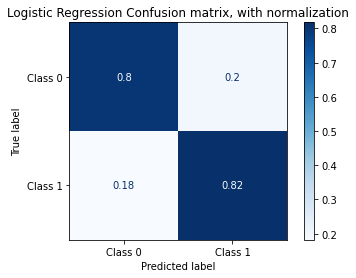

In [67]:
disp = metrics.plot_confusion_matrix(lr_model, X_test, Y_test,
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Logistic Regression Confusion matrix, with normalization')

In [68]:
word_importance = lr_model.coef_[0]
sorted_index = np.argsort(word_importance)

#top 20 positive words 
top_20_pos_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_index[range(-1,-21, -1)]]
print(f"Top 20 Positive words for Logistic regression with stopwords {top_20_pos_w}")

# top 20 negative words 
top_20_neg_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_index[:20]]
print(f"\nTop 20 Negative words for Logistic regression with stopwords {top_20_neg_w}")

Top 20 Positive words for Logistic regression with stopwords ['great', 'excellent', 'perfect', 'best', 'highly', 'easy', 'clear', 'fast', '512', 'price', 'worth', 'simple', 'little', 'expected', 'works', 'happy', 'love', 'problems', 'awesome', 'perfectly']

Top 20 Negative words for Logistic regression with stopwords ['poor', 'return', 'waste', 'not', 'back', 'terrible', 'disappointed', '30', 'started', 'worst', 'maybe', 'returned', 'labels', 'purchased', 'replacement', 'buy', 'unless', 'failed', 'often', 'returning']


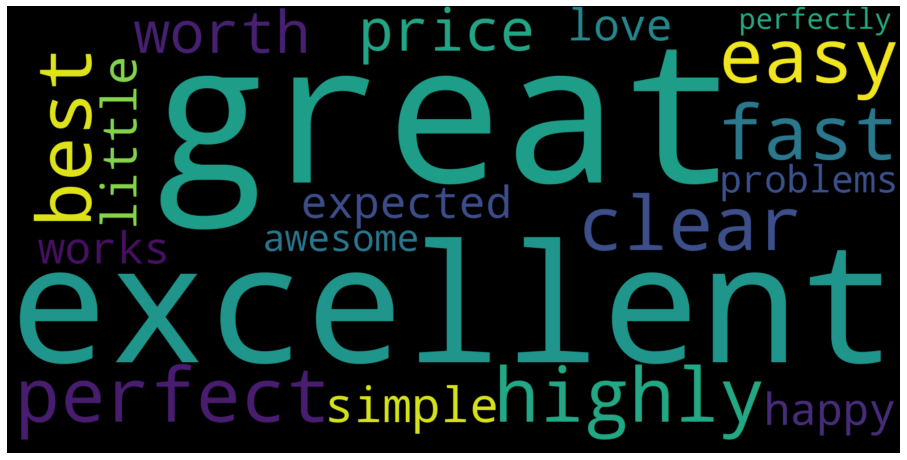

In [69]:
print_wordcloud(top_20_pos_w)

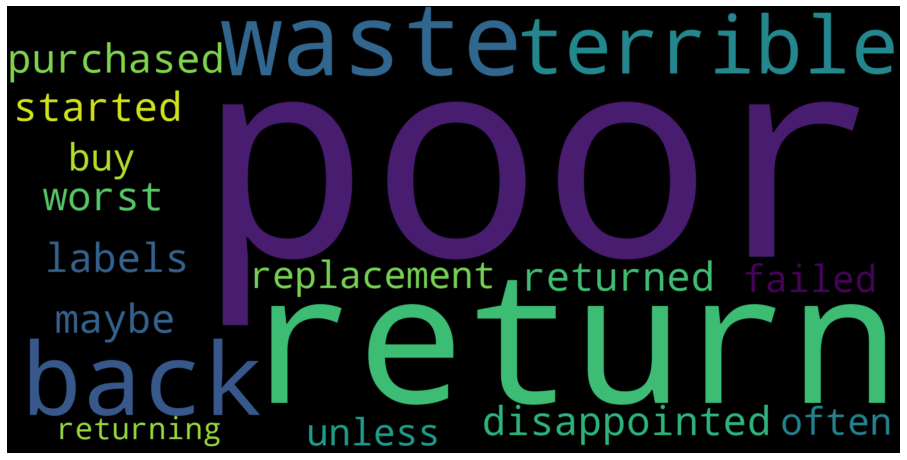

In [70]:
print_wordcloud(top_20_neg_w)

In [71]:
#Logistic regression with text with stopwords. Binary
lr_model = LogisticRegression()
lr_model.fit(X_train_b, Y_train_b)
y_pred = lr_model.predict(X_test_b)

accuracy_score_lr = metrics.accuracy_score(lr_model.predict(X_test_b), Y_test_b)
print('Logistic Regression Accuracy Score = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')
print(f"\nConfusion Matrix for Logistic Regression: \n{metrics.confusion_matrix(Y_test_b, y_pred)}")
print(f"\nClassification Report: \n{metrics.classification_report(Y_test_b, y_pred)}")

Logistic Regression Accuracy Score = 83.33%

Confusion Matrix for Logistic Regression: 
[[250  48]
 [ 54 248]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       298
           1       0.84      0.82      0.83       302

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



Text(0.5, 1.0, 'Logistic Regression Confusion matrix, with normalization')

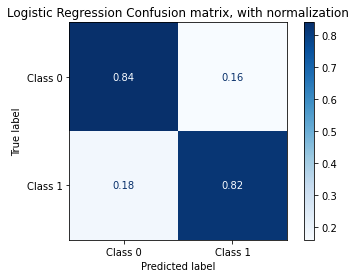

In [72]:
disp = metrics.plot_confusion_matrix(lr_model, X_test_b, Y_test_b,
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Logistic Regression Confusion matrix, with normalization')

In [73]:
word_importance = lr_model.coef_[0]
sorted_index = np.argsort(word_importance)

#top 20 positive words 
top_20_pos_wb = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_index[range(-1,-21, -1)]]
print(f"Top 20 Positive words {top_20_pos_wb}")

# top 20 negative words 
top_20_neg_wb = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_index[:20]]
print(f"\nTop 20 Negative words {top_20_neg_wb}")

Top 20 Positive words ['great', 'perfect', 'best', 'highly', 'excellent', 'easy', 'price', 'little', 'clear', 'fast', 'simple', 'pleased', 'happy', 'works', 'used', 'awesome', 've', 'outstanding', '512', 'expected']

Top 20 Negative words ['poor', 'waste', 'return', 'terrible', 'returned', 'not', 'maybe', 'disappointed', 'back', 'work', 'out', '30', 'worst', 'often', 'started', 'sucks', 'help', 'flaw', 'purchased', 'buy']


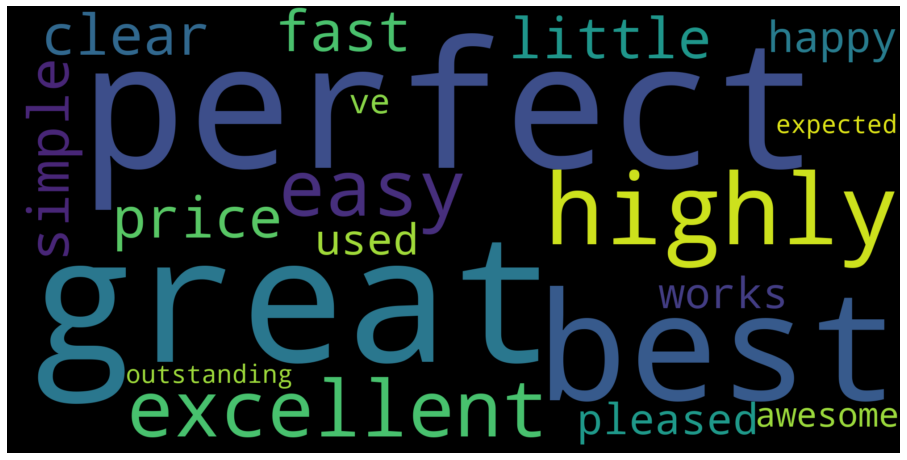

In [74]:
print_wordcloud(top_20_pos_wb)

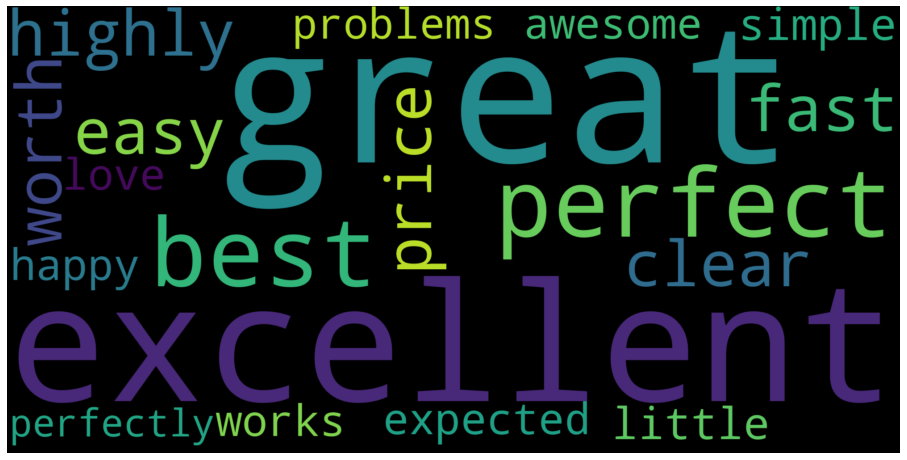

In [75]:
print_wordcloud(top_20_pos_w)

In [76]:
#Logistic regression without stopwords. x_train_nosw, x_test_nosw, y_train_nosw, y_test_nosw

lr_model = LogisticRegression()
lr_model.fit(x_train_nosw, y_train_nosw)
y_pred = lr_model.predict(x_test_nosw)

accuracy_score_lr = metrics.accuracy_score(lr_model.predict(x_test_nosw), y_test_nosw)
print("Logistic Regression Accuracy Score without Stopwords = "+str("{:4.2f}".format(accuracy_score_mnb*100))+"%")
print(f"\nConfusion Matrix for Logistic Regression: \n{metrics.confusion_matrix(y_test_nosw, y_pred)}")
print(f"\nClassification Report: \n{metrics.classification_report(y_test_nosw, y_pred)}")

Logistic Regression Accuracy Score without Stopwords = 83.33%

Confusion Matrix for Logistic Regression: 
[[245  53]
 [ 53 249]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       298
           1       0.82      0.82      0.82       302

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



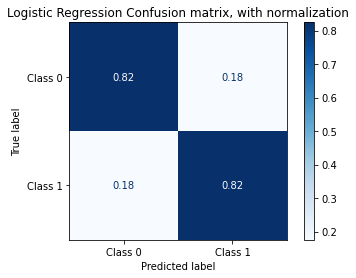

In [77]:
#X_train, X_test, Y_train, Y_test
disp = metrics.plot_confusion_matrix(lr_model, x_test_nosw, y_test_nosw,
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Logistic Regression Confusion matrix, with normalization');

In [78]:
word_importance = lr_model.coef_[0]
sorted_index = np.argsort(word_importance)

#top 20 positive words 
top_20_pos_nosw = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_index[range(-1,-21, -1)]]
print(f"Top 20 Positive words for Logistic regression without stopwords {top_20_pos_nosw}")

# top 20 negative words 
top_20_neg_nosw = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_index[:20]]
print(f"\nTop 20 Negative words for Logistic regression without stopwords {top_20_neg_nosw}")



Top 20 Positive words for Logistic regression without stopwords ['goodnight', 'positions', 'whe', 'europe', 'e', 'hear', 'belief', 'paris', 'unfreeze', 'gig', 'propreitary', 'liberty', 'loading', 'unfortuntately', 'fadeout', 'alone', 'wacker', 'excess', 'photocopying', 'h3']

Top 20 Negative words for Logistic regression without stopwords ['reproduce', 'wg111t', 'aways', 'virtually', 'pita', 'toshiba', 'wgt624v3', 'reproducing', 'tailored', 'stumbled', 'backedup', 'inverter', 'diminish', 'manning', 'erratically', 'speck', 'wherever', 'miserably', 'reproduction', 'garage']


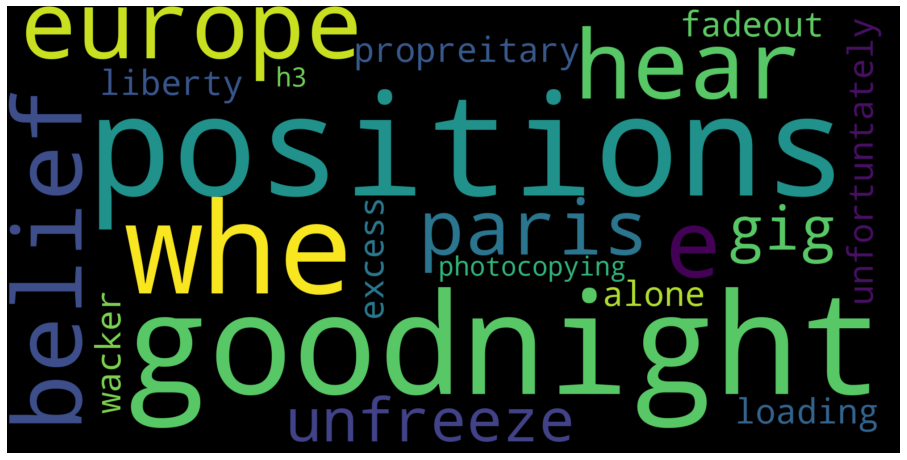

In [79]:
print_wordcloud(top_20_pos_nosw)

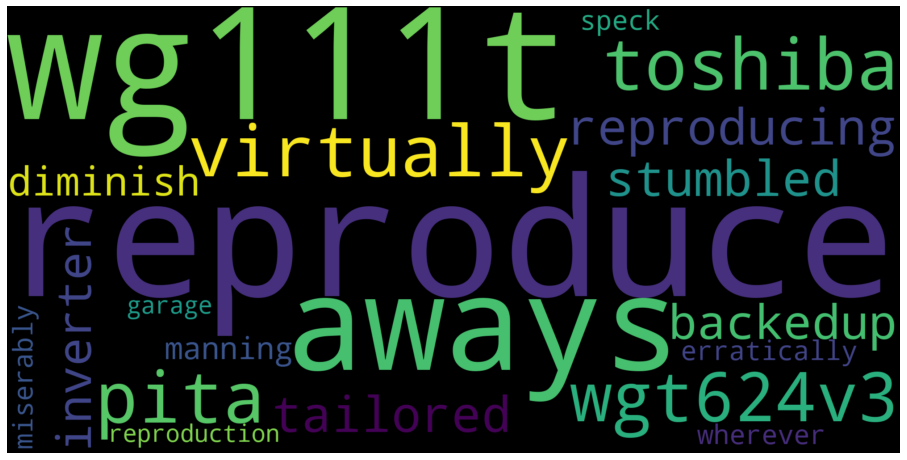

In [80]:
print_wordcloud(top_20_neg_nosw)